In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('LoanData.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.describe(include = 'object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001431,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [8]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [11]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [12]:
df.isnull().sum().sum()

0

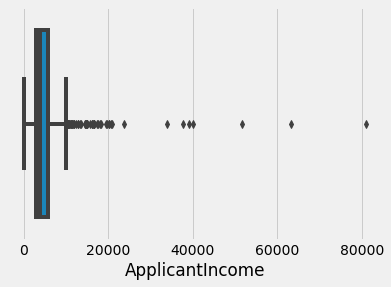

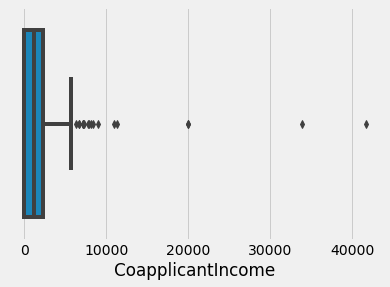

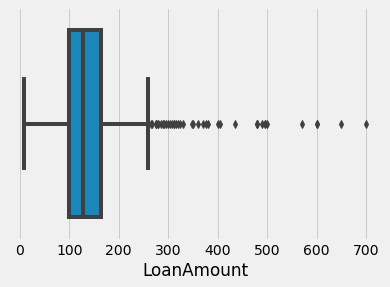

In [13]:
for i in (df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']].columns):
    sns.boxplot(df[i])
    plt.show()

In [14]:
df = df[df['ApplicantIncome'] < 25000]
df = df[df['CoapplicantIncome'] < 10000]
df = df[df['LoanAmount'] < 400]

In [15]:
df.shape

(590, 13)

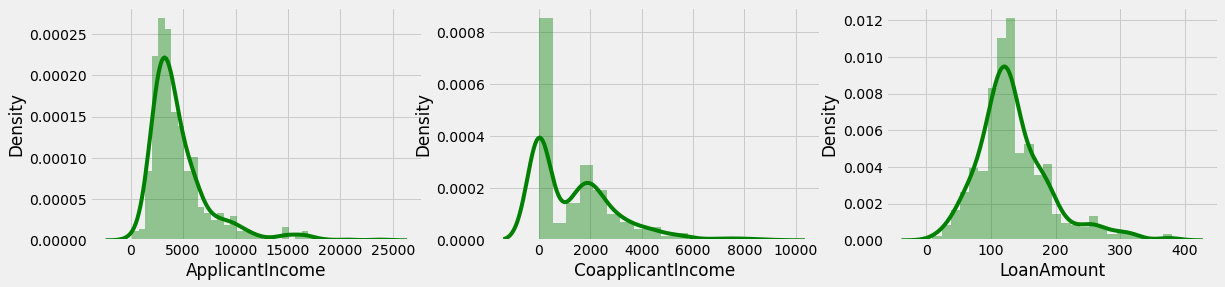

In [16]:
plt.rcParams['figure.figsize'] = (18,4)
plt.subplot(1,3,1)
sns.distplot(df['ApplicantIncome'], color = 'g')

plt.subplot(1,3,2)
sns.distplot(df['CoapplicantIncome'], color = 'g')

plt.subplot(1,3,3)
sns.distplot(df['LoanAmount'], color = 'g')

plt.show()

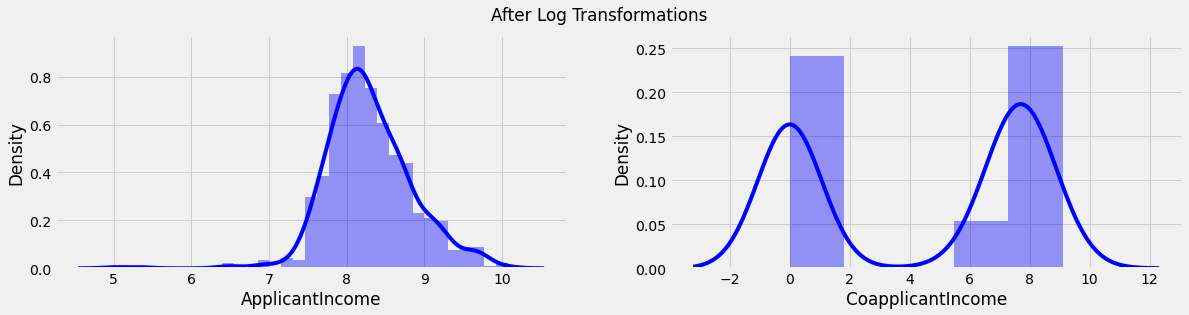

In [17]:
plt.rcParams['figure.figsize'] = (18,4)

df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])

plt.subplot(1,2,1)
sns.distplot(df['ApplicantIncome'], color = 'b')

plt.subplot(1,2,2)
sns.distplot(df['CoapplicantIncome'], color = 'b')

plt.suptitle('After Log Transformations')
plt.show()

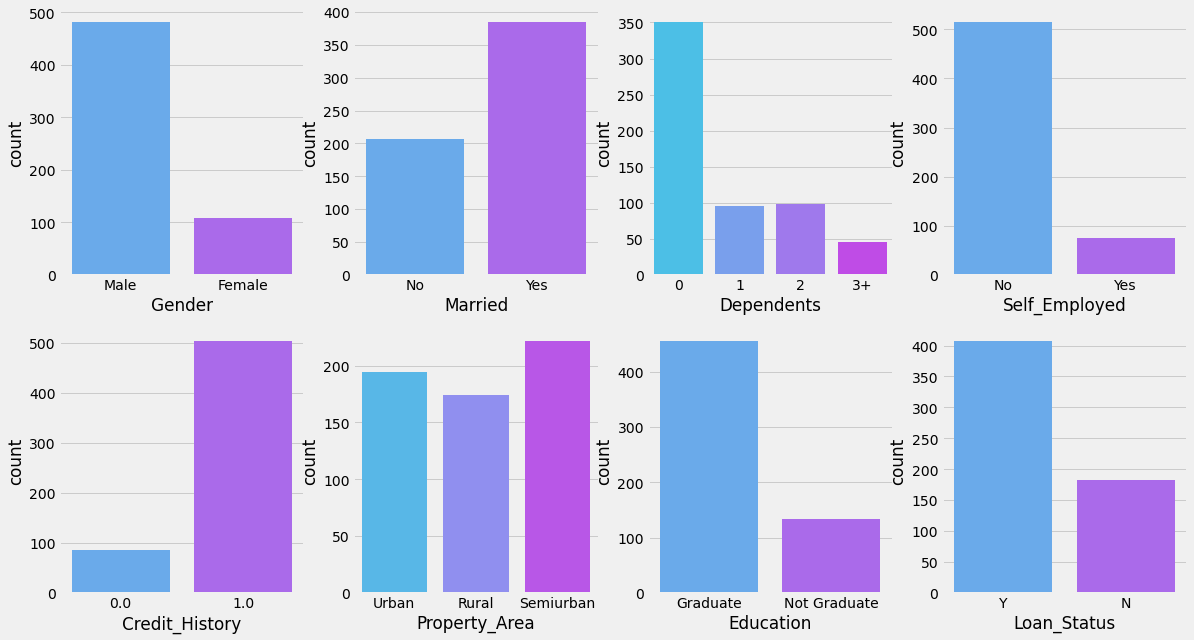

In [18]:
plt.rcParams['figure.figsize'] = (18,10)

plt.subplot(2,4,1)
sns.countplot(df['Gender'], palette = 'cool' )

plt.subplot(2,4,2)
sns.countplot(df['Married'], palette = 'cool')

plt.subplot(2,4,3)
sns.countplot(df['Dependents'], palette = 'cool')

plt.subplot(2,4,4)
sns.countplot(df['Self_Employed'], palette = 'cool')

plt.subplot(2,4,5)
sns.countplot(df['Credit_History'], palette = 'cool')

plt.subplot(2,4,6)
sns.countplot(df['Property_Area'], palette = 'cool')

plt.subplot(2,4,7)
sns.countplot(df['Education'], palette = 'cool')

plt.subplot(2,4,8)
sns.countplot(df['Loan_Status'], palette = 'cool')

plt.show()

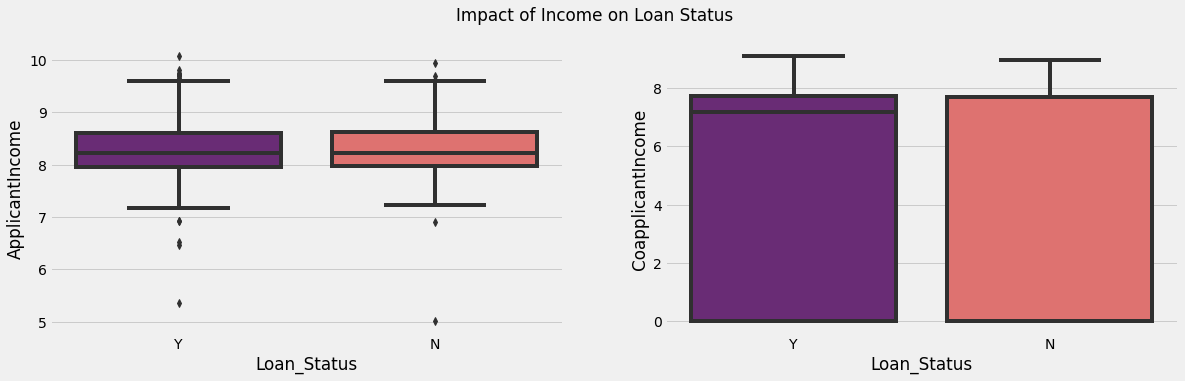

In [19]:
plt.rcParams['figure.figsize'] = (18,5)

plt.subplot(1,2,1)
sns.boxplot(df['Loan_Status'], df['ApplicantIncome'], palette = 'magma')

plt.subplot(1,2,2)
sns.boxplot(df['Loan_Status'], df['CoapplicantIncome'], palette = 'magma')

plt.suptitle('Impact of Income on Loan Status')
plt.show()


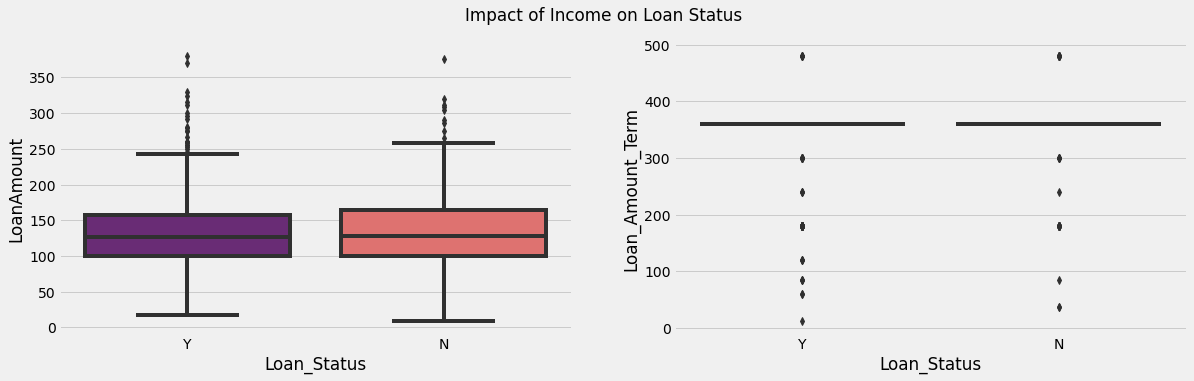

In [20]:
plt.rcParams['figure.figsize'] = (18,5)

plt.subplot(1,2,1)
sns.boxplot(df['Loan_Status'], df['LoanAmount'], palette = 'magma')

plt.subplot(1,2,2)
sns.boxplot(df['Loan_Status'], df['Loan_Amount_Term'], palette = 'magma')

plt.suptitle('Impact of Income on Loan Status')
plt.show()


In [21]:
print('Impact of Marriage on Loan Status')
print(pd.crosstab(df['Loan_Status'], df['Married']))
print('\n')

print('Impact of Dependents on Loan Status')
print(pd.crosstab(df['Loan_Status'], df['Dependents']))
print('\n')

print('Impact of Education on Loan Status')
print(pd.crosstab(df['Loan_Status'], df['Education']))
print('\n')

print('Impact of Employment on Loan Status')
print(pd.crosstab(df['Loan_Status'], df['Self_Employed']))
print('\n')

print('Impact of Property on Loan Status')
print(pd.crosstab(df['Loan_Status'], df['Property_Area']))
print('\n')

Impact of Marriage on Loan Status
Married       No  Yes
Loan_Status          
N             76  106
Y            130  278


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            110  33  24  15
Y            240  63  74  31


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 130            52
Y                 326            82


Impact of Employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              157   25
Y              357   51


Impact of Property on Loan Status
Property_Area  Rural  Semiurban  Urban
Loan_Status                           
N                 66         51     65
Y                108        171    129




In [22]:
df.select_dtypes('object').head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [23]:
df = df.drop(['Loan_ID'], axis = 1)
df.shape

(590, 12)

In [24]:
df['Gender'] = df['Gender'].replace({'Male':1, 'Female':0})
df['Married'] = df['Married'].replace({'Yes':1, 'No':0})
df['Education'] = df['Education'].replace({'Graduate':1, 'Not Graduate':0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes':1, 'No':0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1, 'N':0})
df['Property_Area'] = df['Property_Area'].replace({'Urban':1, 'Semiurban':1, 'Rural':0})
df['Dependents'] = df['Dependents'].replace({'0':0, '1':1, '2':1, '3+':1})

In [25]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,7.319202,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,7.765993,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


In [26]:
X = df.drop('Loan_Status', axis = 1)
y = df['Loan_Status']

In [29]:
from imblearn.over_sampling import SMOTE

X_resample, y_resample = SMOTE().fit_sample(X,y.values.ravel())

print(X_resample.shape)
print(y_resample.shape)

(816, 11)
(816,)


In [33]:
print('Before Resampling')
print(y.value_counts())

print('After Resampling')
y_resample = pd.DataFrame(y_resample)
print(y_resample[0].value_counts())

Before Resampling
1    408
0    182
Name: Loan_Status, dtype: int64
After Resampling
1    408
0    408
Name: 0, dtype: int64


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size = 0.3, random_state = 10)

In [36]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [37]:
y_pred = LR.predict(X_test)

print('Training Accuracy :', LR.score(X_train, y_train))
print('Testing Accuracy :', LR.score(X_test, y_test))

Training Accuracy : 0.8248686514886164
Testing Accuracy : 0.7387755102040816


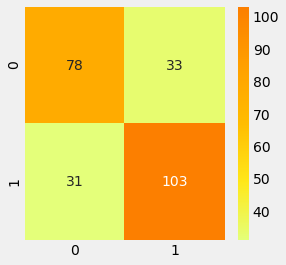

              precision    recall  f1-score   support

           0       0.72      0.70      0.71       111
           1       0.76      0.77      0.76       134

    accuracy                           0.74       245
   macro avg       0.74      0.74      0.74       245
weighted avg       0.74      0.74      0.74       245



In [38]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (4,4))
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

print(classification_report(y_test, y_pred))

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)

GradientBoostingClassifier()

In [40]:
y_pred = GB.predict(X_test)

print('Training Accuracy :', GB.score(X_train, y_train))
print('Testing Accuracy :', GB.score(X_test, y_test))

Training Accuracy : 0.9387040280210157
Testing Accuracy : 0.7714285714285715


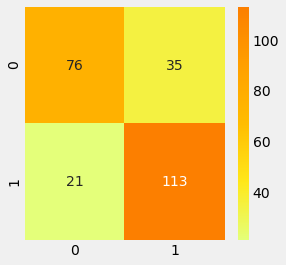

              precision    recall  f1-score   support

           0       0.78      0.68      0.73       111
           1       0.76      0.84      0.80       134

    accuracy                           0.77       245
   macro avg       0.77      0.76      0.77       245
weighted avg       0.77      0.77      0.77       245



In [41]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (4,4))
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

print(classification_report(y_test, y_pred))

In [43]:
from sklearn.model_selection import cross_val_score

clf = GradientBoostingClassifier(random_state = 0)
scores = cross_val_score(clf, X_train, y_train, cv = 10)

print(scores)

[0.75862069 0.85964912 0.87719298 0.87719298 0.84210526 0.80701754
 0.84210526 0.78947368 0.73684211 0.87719298]
